# Project -- Ryan Kim -- 200390560
The question I plan on analyzing in this document is: How has the size of Canada's military changed? Specificly analyzing military staff with respect to time periods of major global conflict.

Using two data sets: (Cleaned slightly-- they originally had french annotations and confusing white space.)
- "Canadian Armed Forces Regular Force Members by Rank" https://open.canada.ca/data/en/dataset/460aa2e0-5a37-47cf-a858-98b4327d29de
- "Canadian Armed Forces Regular Force Intake" https://open.canada.ca/data/en/dataset/80c75c39-80fe-4fff-8290-49e2b66e07e6 

I will also have informal references to dates on which major global conflicts occured.


## Motivation
- The number of global conflicts is as high as ever, and so I would like to analyze and gain insight into how the Canadian Armed forces a reacting and preparing (or failing to do so).

## Approach
- I plan on considering the history of the Armed forces population with respect to its intake (growth) and the projecting this fluctuating size into the future as well as considering when demand for Armed forces members might increase or fall.

---

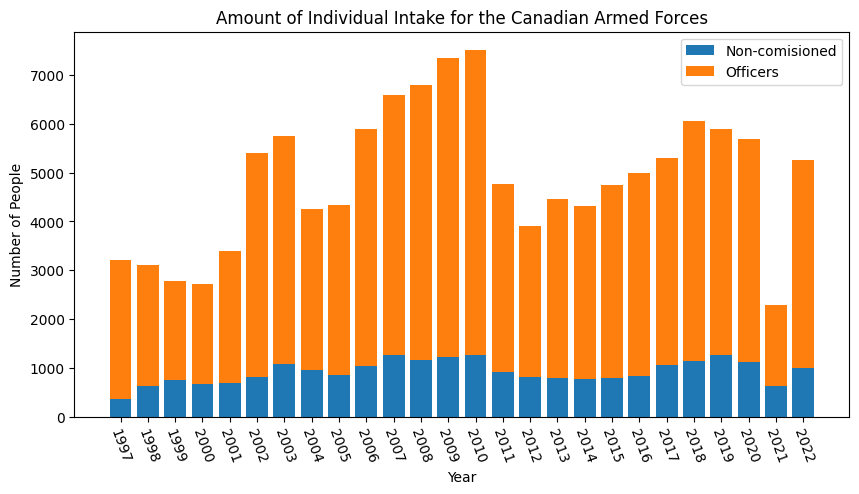

In [26]:
# Import pandas, numpy, and matplotlib  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "data/"
files = ["od-2019-00008-canadian-armed-forces-regular-force-intake-admission-dans-la-force-reguliere-des-f.csv", "od-2019-00005-caf-regular-force-members-by-rank.csv"]

# Extract data from csv file and remove Nan
raw_csv = pd.read_csv(path + files[0])
Intake_stats = raw_csv.dropna()

officers = Intake_stats.iloc[0]
non_comisioned= Intake_stats.iloc[1]
total = Intake_stats.iloc[2]
columns = Intake_stats.columns

# Pivot officers data frame
officers = officers.to_frame()
officers = officers.reset_index()
officers.columns = ["Year", "Number of people"]
officers = officers.drop([0])
officers = officers.set_index("Year")
officers = officers.astype(int)

# Pivot non_comisioned data frame
non_comisioned = non_comisioned.to_frame()
non_comisioned = non_comisioned.reset_index()
non_comisioned.columns = ["Year", "Number of people"]
non_comisioned = non_comisioned.drop([0])
non_comisioned = non_comisioned.set_index("Year")
non_comisioned = non_comisioned.astype(int)

# Plot non_comisioned and officers to a stacked bar chart
plt.figure(figsize=(10, 5))
plt.bar(officers.index, officers["Number of people"], label="Officers")
plt.bar(non_comisioned.index, non_comisioned["Number of people"], bottom=officers["Number of people"], label="Non-comisioned")


plt.xticks(rotation=-70)

plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("Amount of Individual Intake for the Canadian Armed Forces")
plt.legend(["Non-comisioned", "Officers"])
plt.show()


### Explanation of Above visualization and key points

Orange highlights the increase in the number of Officers in the military and the blue is all Non-comisioned members of the miliatary.

The distinction between officer and non-commisionsed member (NCM) are only based on ones military rank. One is an NCM from the rank of "private" to "Chief Warrant Officer".

Particular patterns of note:
- Increase in total intake from 2001 til 2011.
- The pattern of officer intake being significantly greater than NCM's imply a significant potential for the growth of officers.
- After the decline in intake in 2011 it has been increasing.

---

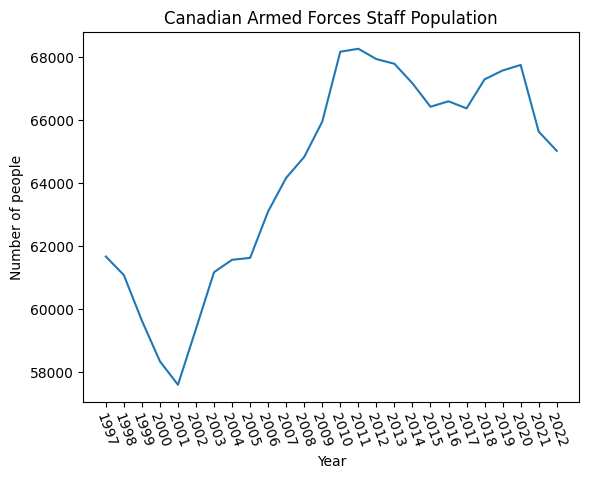

In [27]:
raw_csv = pd.read_csv(path + files[1])
enlistment_stats = raw_csv.dropna()

total = enlistment_stats.iloc[15]

# Pivot total data frame
total = total.to_frame()
total = total.reset_index()
total.columns = ["Year", "Number of people"]
total = total.drop([0])
total = total.set_index("Year")
total = total.astype(int)

# Plot total
plt.plot(total)
plt.xticks(rotation=-70)
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Canadian Armed Forces Staff Population")
plt.show()


### Explanation of the above graph

The combined population statistics for Officers and NCMs.

---

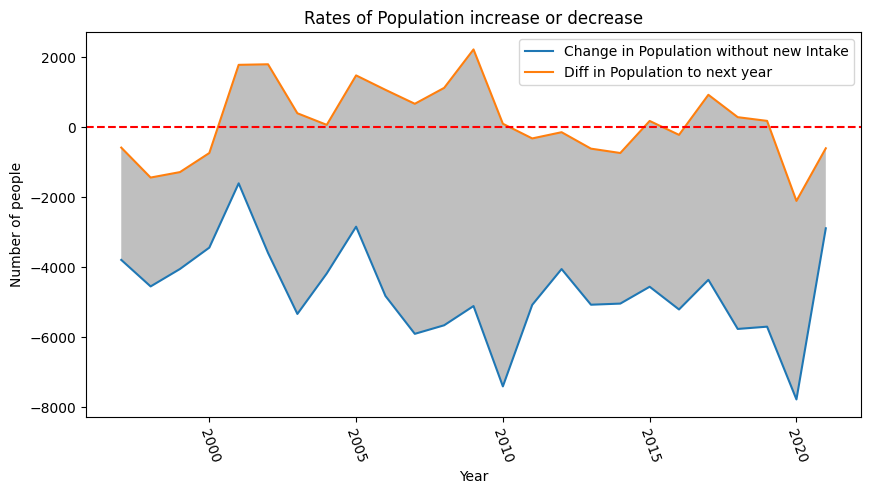

In [163]:

start_year = 1997
end_year = 2022

# The Difference in population between consecutive years
diff = {}
for year in range(start_year, end_year):
    next_year = year + 1
    diff[year] = total.loc[str(next_year)] - total.loc[str(year)]

loss = {}

# Calculate the total rate of loss in population. This is done by considering the portion of the population that was gained in that year via "Intake"
for year in range(start_year, end_year):
    next_year = year + 1
    
    officer_intake = officers.loc[str(year)].values[0]
    non_comisioned_intake = non_comisioned.loc[str(year)].values[0]
    total_intake = officer_intake + non_comisioned_intake

    loss[year] = diff[year].values[0] - total_intake

# Create data frames
loss = pd.DataFrame.from_dict(loss, orient="index")
loss.columns = ["Loss"]

diff = pd.DataFrame.from_dict(diff, orient="index")
diff.columns = ["Difference"]

# Plot the loss in population versus the size of the intake for commisioned and non-commisioned members.
plt.figure(figsize=(10, 5))
plt.plot(loss, label="Change in Population without new Intake")
plt.plot(diff, label="Diff in Population to next year")
plt.axhline(y=0, color='r', linestyle='--')
plt.fill_between(diff.index, diff["Difference"], loss["Loss"], facecolor='grey', alpha=0.5)
plt.xticks(rotation=-70)
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Rates of Population increase or decrease")
plt.legend()
plt.show()



### Explanation of the above visual and some key points

- The Blue line represents the change in population before accounting for new Intake. Meaning this line represents the overall rate loss in the Canadian military.

- The Orange line represents the real change in size after intake.

- The Shaded area between both lines represents the affect of new intake. An increase in the area between both lines indicates an increase in intake.
---

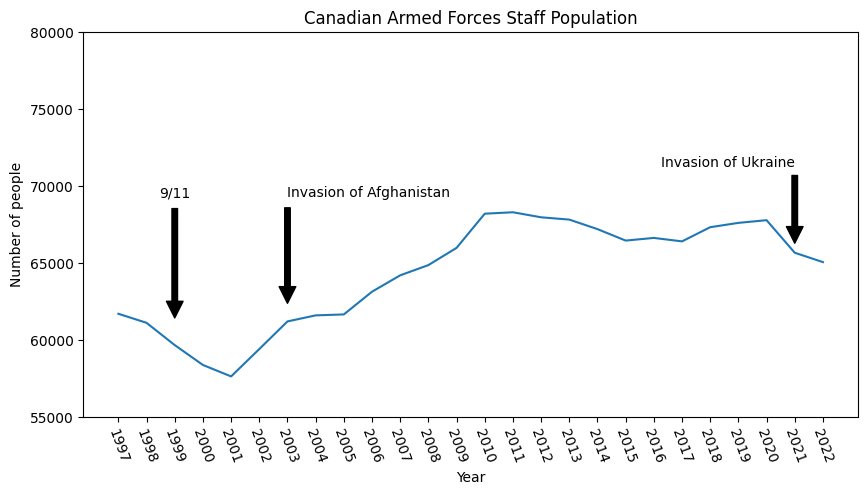

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot that previous data with anotations
line = ax.plot(total)


ax.annotate('9/11', xy=(2, 61000),
            xytext=(2, 70000), xycoords="data",
            va='top', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Invasion of Afghanistan', xy=(6, 62000),
            xytext=(6, 70000), xycoords="data",
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Invasion of Ukraine', xy=(24, 66000),
            xytext=(24, 72000), xycoords="data",
            va='top', ha='right',
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.set_ylim(55000, 80000)

plt.xticks(rotation=-70)
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Canadian Armed Forces Staff Population")
plt.show()


### Explanation of the above visuals and some key points

- As seen above after 9/11 the size of the Canadian Armed Forces sharply began increasingt and has recently begun to decrease.
- At the very end of the chart the Invasion of Ukraine is seen. This will likely affect staffing into the future beyond 2022.
- From this chart I predict an increase in the number of people enlisted in the Canadian Armed forces.
---

# Conclusion

In conclusion the size of the Canadian Armed Forces varies drastically according to the global politcal climate and also internal factors.

As of 2022 the military was losing personal. This was caused by an **abonormal drop in intake** as well as an **abonormal increase in the loss of staff**. This represents an overall sentiment of not wanting to me a member of the military.

In the near future we can expect a rise in the number of enlisted members of the military from the current low point.